# **CNN Image Classification to detect AI or Real ART**

In [92]:
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [93]:
datadir = r'/content/drive/MyDrive/Data science/data scientist/Projects/Project 4 : image classificaton/newimg'
IMAGE_SIZE = 128
batchsize = 10
epochs = 10
tessplit = 0.3

##**Data Transformation**

In [94]:


data_transform = transforms.Compose([transforms.Resize((imagesize,imagesize)),
                                  transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor()
                                     ])

## **Loading The Dataset**

In [95]:
full_dataset = datasets.ImageFolder(datadir,transform = data_transform)

## **Splitting The Data**

In [96]:

train_size = int((1-tessplit)*len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset,test_dataset = torch.utils.data.random_split(full_dataset,[train_size,test_size])

train_loader = DataLoader(train_dataset,batch_size = batchsize,shuffle=True,num_workers = 4)
test_loader = DataLoader(test_dataset,batch_size = batchsize,shuffle = False,num_workers = 4)

print(f'Training data avalailable={len(train_loader)}')
print(f'Testing data avalailable={len(test_loader)}')

Training data avalailable=69
Testing data avalailable=30


## **Show Images From Dataset**

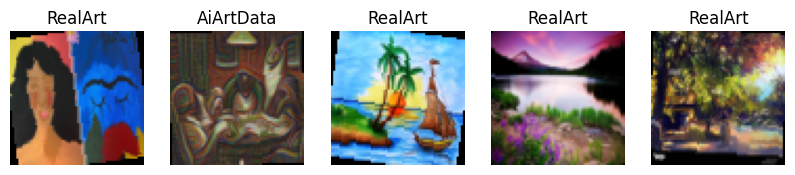

In [97]:
#show images

def show_images(dataset, num_images=5):
    class_names = dataset.classes
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))

    for i in range(num_images):
        idx = random.randint(0, len(dataset))
        image, label = dataset[idx]
        image = image.permute(1, 2, 0)
        axes[i].imshow(image)
        axes[i].set_title(class_names[label])
        axes[i].axis('off')

    plt.show()

show_images(full_dataset)

## **Defining CNN**

In [98]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
       # print(x.size())
        x = x.view(-1, 128 * 16 * 16)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## **Model Initialization**

In [99]:

torch.manual_seed(101)
cnnmodel = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnnmodel.parameters(),lr = 0.001)
cnnmodel

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

## **Training The Data**

In [100]:
import time

EPOCHS = 10
start_time = time.time()

max_trn_batch = 69

train_losses = []
train_correct = []

for epoch in range(EPOCHS):
    trn_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b += 1

        # Forward pass
        y_pred = cnnmodel(X_train)
        loss = criterion(y_pred, y_train)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record statistics
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        if b % 10 == 0:
            print(f'Epoch: {epoch+1:2}  Batch: {b:4}  Loss: {loss.item():.4f}  Accuracy: {trn_corr.item()*100/(10*b):.2f}%')
            train_losses.append(loss)
            train_correct.append(trn_corr)


Epoch:  1  Batch:   10  Loss: 0.7012  Accuracy: 48.00%
Epoch:  1  Batch:   20  Loss: 0.6855  Accuracy: 48.50%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  1  Batch:   30  Loss: 0.6809  Accuracy: 54.67%
Epoch:  1  Batch:   40  Loss: 0.6883  Accuracy: 53.50%
Epoch:  1  Batch:   50  Loss: 0.7096  Accuracy: 53.00%
Epoch:  1  Batch:   60  Loss: 0.7021  Accuracy: 53.50%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  2  Batch:   10  Loss: 0.6582  Accuracy: 63.00%
Epoch:  2  Batch:   20  Loss: 0.5667  Accuracy: 61.00%
Epoch:  2  Batch:   30  Loss: 0.6236  Accuracy: 56.00%
Epoch:  2  Batch:   40  Loss: 0.7388  Accuracy: 58.00%
Epoch:  2  Batch:   50  Loss: 0.7096  Accuracy: 56.40%
Epoch:  2  Batch:   60  Loss: 0.7131  Accuracy: 55.67%
Epoch:  3  Batch:   10  Loss: 0.5846  Accuracy: 60.00%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  3  Batch:   20  Loss: 0.5275  Accuracy: 65.00%
Epoch:  3  Batch:   30  Loss: 0.6448  Accuracy: 63.00%
Epoch:  3  Batch:   40  Loss: 0.6819  Accuracy: 63.25%
Epoch:  3  Batch:   50  Loss: 0.5054  Accuracy: 65.20%
Epoch:  3  Batch:   60  Loss: 0.6708  Accuracy: 64.33%
Epoch:  4  Batch:   10  Loss: 0.9096  Accuracy: 66.00%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  4  Batch:   20  Loss: 0.5507  Accuracy: 66.00%
Epoch:  4  Batch:   30  Loss: 0.6059  Accuracy: 66.67%
Epoch:  4  Batch:   40  Loss: 0.8122  Accuracy: 64.00%
Epoch:  4  Batch:   50  Loss: 0.5943  Accuracy: 63.20%
Epoch:  4  Batch:   60  Loss: 0.7878  Accuracy: 62.00%
Epoch:  5  Batch:   10  Loss: 1.0672  Accuracy: 66.00%
Epoch:  5  Batch:   20  Loss: 0.6043  Accuracy: 67.00%
Epoch:  5  Batch:   30  Loss: 0.7169  Accuracy: 64.00%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  5  Batch:   40  Loss: 0.5554  Accuracy: 64.50%
Epoch:  5  Batch:   50  Loss: 0.5236  Accuracy: 66.20%
Epoch:  5  Batch:   60  Loss: 0.5185  Accuracy: 65.50%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  6  Batch:   10  Loss: 0.6161  Accuracy: 72.00%
Epoch:  6  Batch:   20  Loss: 0.6492  Accuracy: 70.00%
Epoch:  6  Batch:   30  Loss: 0.6732  Accuracy: 65.67%
Epoch:  6  Batch:   40  Loss: 0.4143  Accuracy: 65.00%
Epoch:  6  Batch:   50  Loss: 0.4338  Accuracy: 65.40%
Epoch:  6  Batch:   60  Loss: 0.6224  Accuracy: 64.83%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  7  Batch:   10  Loss: 0.4704  Accuracy: 74.00%
Epoch:  7  Batch:   20  Loss: 0.2117  Accuracy: 75.50%
Epoch:  7  Batch:   30  Loss: 0.3698  Accuracy: 73.67%
Epoch:  7  Batch:   40  Loss: 0.6531  Accuracy: 72.50%
Epoch:  7  Batch:   50  Loss: 0.4385  Accuracy: 71.80%
Epoch:  7  Batch:   60  Loss: 0.5298  Accuracy: 71.83%
Epoch:  8  Batch:   10  Loss: 0.3414  Accuracy: 81.00%
Epoch:  8  Batch:   20  Loss: 0.5676  Accuracy: 74.00%
Epoch:  8  Batch:   30  Loss: 0.6214  Accuracy: 72.67%
Epoch:  8  Batch:   40  Loss: 0.5897  Accuracy: 73.50%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  8  Batch:   50  Loss: 0.4126  Accuracy: 73.20%
Epoch:  8  Batch:   60  Loss: 0.6271  Accuracy: 72.17%
Epoch:  9  Batch:   10  Loss: 0.3736  Accuracy: 72.00%
Epoch:  9  Batch:   20  Loss: 0.6010  Accuracy: 71.50%
Epoch:  9  Batch:   30  Loss: 0.3988  Accuracy: 71.33%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:  9  Batch:   40  Loss: 0.3117  Accuracy: 73.00%
Epoch:  9  Batch:   50  Loss: 0.4414  Accuracy: 74.00%
Epoch:  9  Batch:   60  Loss: 0.5910  Accuracy: 74.33%
Epoch: 10  Batch:   10  Loss: 0.4348  Accuracy: 72.00%
Epoch: 10  Batch:   20  Loss: 0.5723  Accuracy: 68.50%


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 10  Batch:   30  Loss: 0.4355  Accuracy: 69.67%
Epoch: 10  Batch:   40  Loss: 0.3576  Accuracy: 70.50%
Epoch: 10  Batch:   50  Loss: 0.5543  Accuracy: 71.60%
Epoch: 10  Batch:   60  Loss: 0.4247  Accuracy: 72.00%


## **Model Testing**

In [102]:

test_losses = []
test_correct = 0
total_samples = 0

with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
        if b == max_trn_batch:
            break

        batch_size = X_test.size(0)  # Get the batch size from the current batch

        # Forward pass
        y_val = cnnmodel(X_test)
        loss = criterion(y_val, y_test)

        # Record statistics
        predicted = torch.max(y_val.data, 1)[1]
        test_correct += (predicted == y_test).sum().item()
        total_samples += batch_size

        if b % 10 == 0:
            print(f'Batch: {b:4}  Loss: {loss.item():.4f}')
            test_losses.append(loss)

test_accuracy = test_correct * 100 / total_samples  # Calculate test accuracy using the total number of samples
print('\nTest results:')
print(f'Accuracy: {test_accuracy:.2f}%')


Batch:    0  Loss: 0.4937
Batch:   10  Loss: 0.4942


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Batch:   20  Loss: 0.9678

Test results:
Accuracy: 65.41%


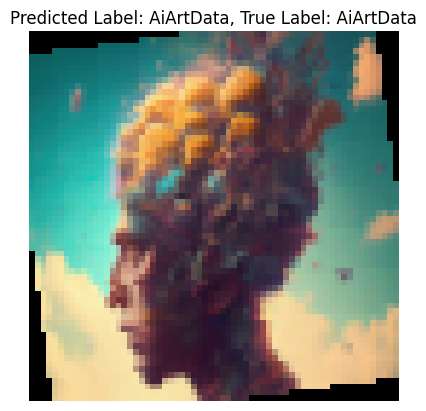

In [107]:
idx = np.random.randint(len(test_dataset))
image, label = test_dataset[idx]

class_names = full_dataset.classes

# Forward pass through the model to get the predicted label
cnnmodel.eval()
with torch.no_grad():
    output = cnnmodel(image.unsqueeze(0))  # Add a batch dimension
predicted_label = torch.argmax(output).item()

# Display the image and its label
plt.imshow(image.permute(1, 2, 0))  # Convert tensor to numpy array and change channel order
plt.title(f'Predicted Label: {class_names[predicted_label]}, True Label: {class_names[label]}')
plt.axis('off')
plt.show()